In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_full = pd.read_json("./data.json")
data_full

,tries,generatorSettings,results
0,1000,"{'elements': 3, 'ksS': 1, 'initialSorting': 'r...","[{'alg': 'BF', 'res': {'sucessTries': 1000, 't..."
1,1000,"{'elements': 3, 'ksS': 1, 'initialSorting': 'r...","[{'alg': 'BF', 'res': {'sucessTries': 1000, 't..."
2,1000,"{'elements': 3, 'ksS': 1, 'initialSorting': 'r...","[{'alg': 'BF', 'res': {'sucessTries': 1000, 't..."
3,1000,"{'elements': 3, 'ksS': 1, 'initialSorting': 'r...","[{'alg': 'BF', 'res': {'sucessTries': 1000, 't..."
4,1000,"{'elements': 3, 'ksS': 1, 'initialSorting': 'r...","[{'alg': 'BF', 'res': {'sucessTries': 1000, 't..."
...,...,...,...
451,1000,"{'elements': 28, 'ksS': 1, 'initialSorting': '...","[{'alg': 'BF', 'res': {'sucessTries': 240, 'ti..."
452,1000,"{'elements': 28, 'ksS': 1, 'initialSorting': '...","[{'alg': 'BF', 'res': {'sucessTries': 276, 'ti..."
453,1000,"{'elements': 28, 'ksS': 1, 'initialSorting': '...","[{'alg': 'BF', 'res': {'sucessTries': 270, 'ti..."
454,1000,"{'elements': 28, 'ksS': 1, 'initialSorting': '...","[{'alg': 'BF', 'res': {'sucessTries': 244, 'ti..."


In [3]:
settings = data_full.get('generatorSettings')
results = data_full.get('results')

In [4]:
settings[0]

{'elements': 3,
 'ksS': 1,
 'initialSorting': 'random',
 'randomness': {'value': 0.05, 'type': 'swap'}}

In [5]:
sorting_types = np.unique(np.array(list(map(lambda x: x['initialSorting'], settings))))
sorting_types

array(['random', 'reversed', 'same'], dtype='<U8')

In [6]:
randomness_types = np.unique(np.array(list(map(lambda x: x['randomness']['type'], settings))))
randomness_types

array(['swap', 'teleport'], dtype='<U8')

In [7]:
algorithm_types = np.unique(np.array(list(map(lambda x: x['alg'], results[0]))))
algorithm_types

array(['BF', 'DM', 'DR', 'FP', 'GR'], dtype='<U2')

data_grouped structure:
- random type + initial sort
  - randomness value
    - elements

In [8]:
data_grouped = {}
for s, r in zip(settings, results):
    string = f'{s["initialSorting"]} {s["randomness"]["type"]}'
    randomness_value = s['randomness']['value']
    elements = s['elements']

    curr = data_grouped

    if not string in curr:
        data_grouped[string] = {}
    curr = curr[string]

    if not randomness_value in curr:
        curr[randomness_value] = {}
    curr = curr[randomness_value]

    curr[elements] = (s, r)

In [9]:
for sortxrandtype in data_grouped:
    print(sortxrandtype)
    for randval in data_grouped[sortxrandtype]:
        print("  " + str(randval))
        for elements in data_grouped[sortxrandtype][randval]:
            print("    " + str(elements))
            print("      " + str(data_grouped[sortxrandtype][randval][elements]))

15
      ({'elements': 15, 'ksS': 1, 'initialSorting': 'reversed', 'randomness': {'value': 0.2, 'type': 'teleport'}}, [{'alg': 'BF', 'res': {'sucessTries': 1000, 'time': {'min': 0, 'max': 31, 'avg': 3.489, 'med': 3, 'qty': 1000}, 'profitDif': {'fixed': {'min': 0, 'max': 0, 'avg': 0, 'med': 0, 'qty': 1000}, 'proportional': {'min': 1, 'max': 1, 'avg': 1, 'med': 1, 'qty': 1000}}}}, {'alg': 'GR', 'res': {'sucessTries': 1000, 'time': {'min': 0, 'max': 7, 'avg': 0.088, 'med': 0, 'qty': 1000}, 'profitDif': {'fixed': {'min': 0, 'max': 5233, 'avg': 199.251, 'med': 0, 'qty': 1000}, 'proportional': {'min': 1, 'max': 1.457670106699317, 'avg': 1.004966135990023, 'med': 1, 'qty': 1000}}}}, {'alg': 'DR', 'res': {'sucessTries': 1000, 'time': {'min': 0, 'max': 14, 'avg': 0.716, 'med': 0, 'qty': 1000}, 'profitDif': {'fixed': {'min': 0, 'max': 0, 'avg': 0, 'med': 0, 'qty': 1000}, 'proportional': {'min': 1, 'max': 1, 'avg': 1, 'med': 1, 'qty': 1000}}}}, {'alg': 'DM', 'res': {'sucessTries': 1000, 'time': {

In [11]:
# minimaly this numer of success tries required for drawing point in line
min_success_ratio = .9
def plot_param(y_selector):
    fig, axs = plt.subplots(len(data_grouped), len(list(data_grouped.items())[0][1].keys()), figsize=(30,30), sharey= 'row')
    for row_i, row_key in enumerate(data_grouped):
        row = data_grouped[row_key]
        for alg in algorithm_types:
            for i, randomness in enumerate(row.keys()):
                ax = axs[row_i, i]

                elements = list(row[randomness].keys())
                elements.sort()

                alg_data = list(map(lambda i: next(x for x in row[randomness][i][1] if x["alg"] == alg), elements))
                success = list(map(lambda x: x["res"]["sucessTries"], alg_data))
                max_success = max(success)
                

                x = elements
                y = map(y_selector, alg_data)
                y = list(y)
                for i, s in enumerate(success):
                    if (s < max_success * min_success_ratio):
                        y[i] = None

                ax.plot(x, y)
                ax.legend(algorithm_types)
                if row_i == 0:
                    ax.set_title(f'{randomness}')
    for ax, row_key in zip(axs[:,0], data_grouped):
        ax.set_ylabel(row_key, rotation= 0, labelpad= 25)
    fig.tight_layout()

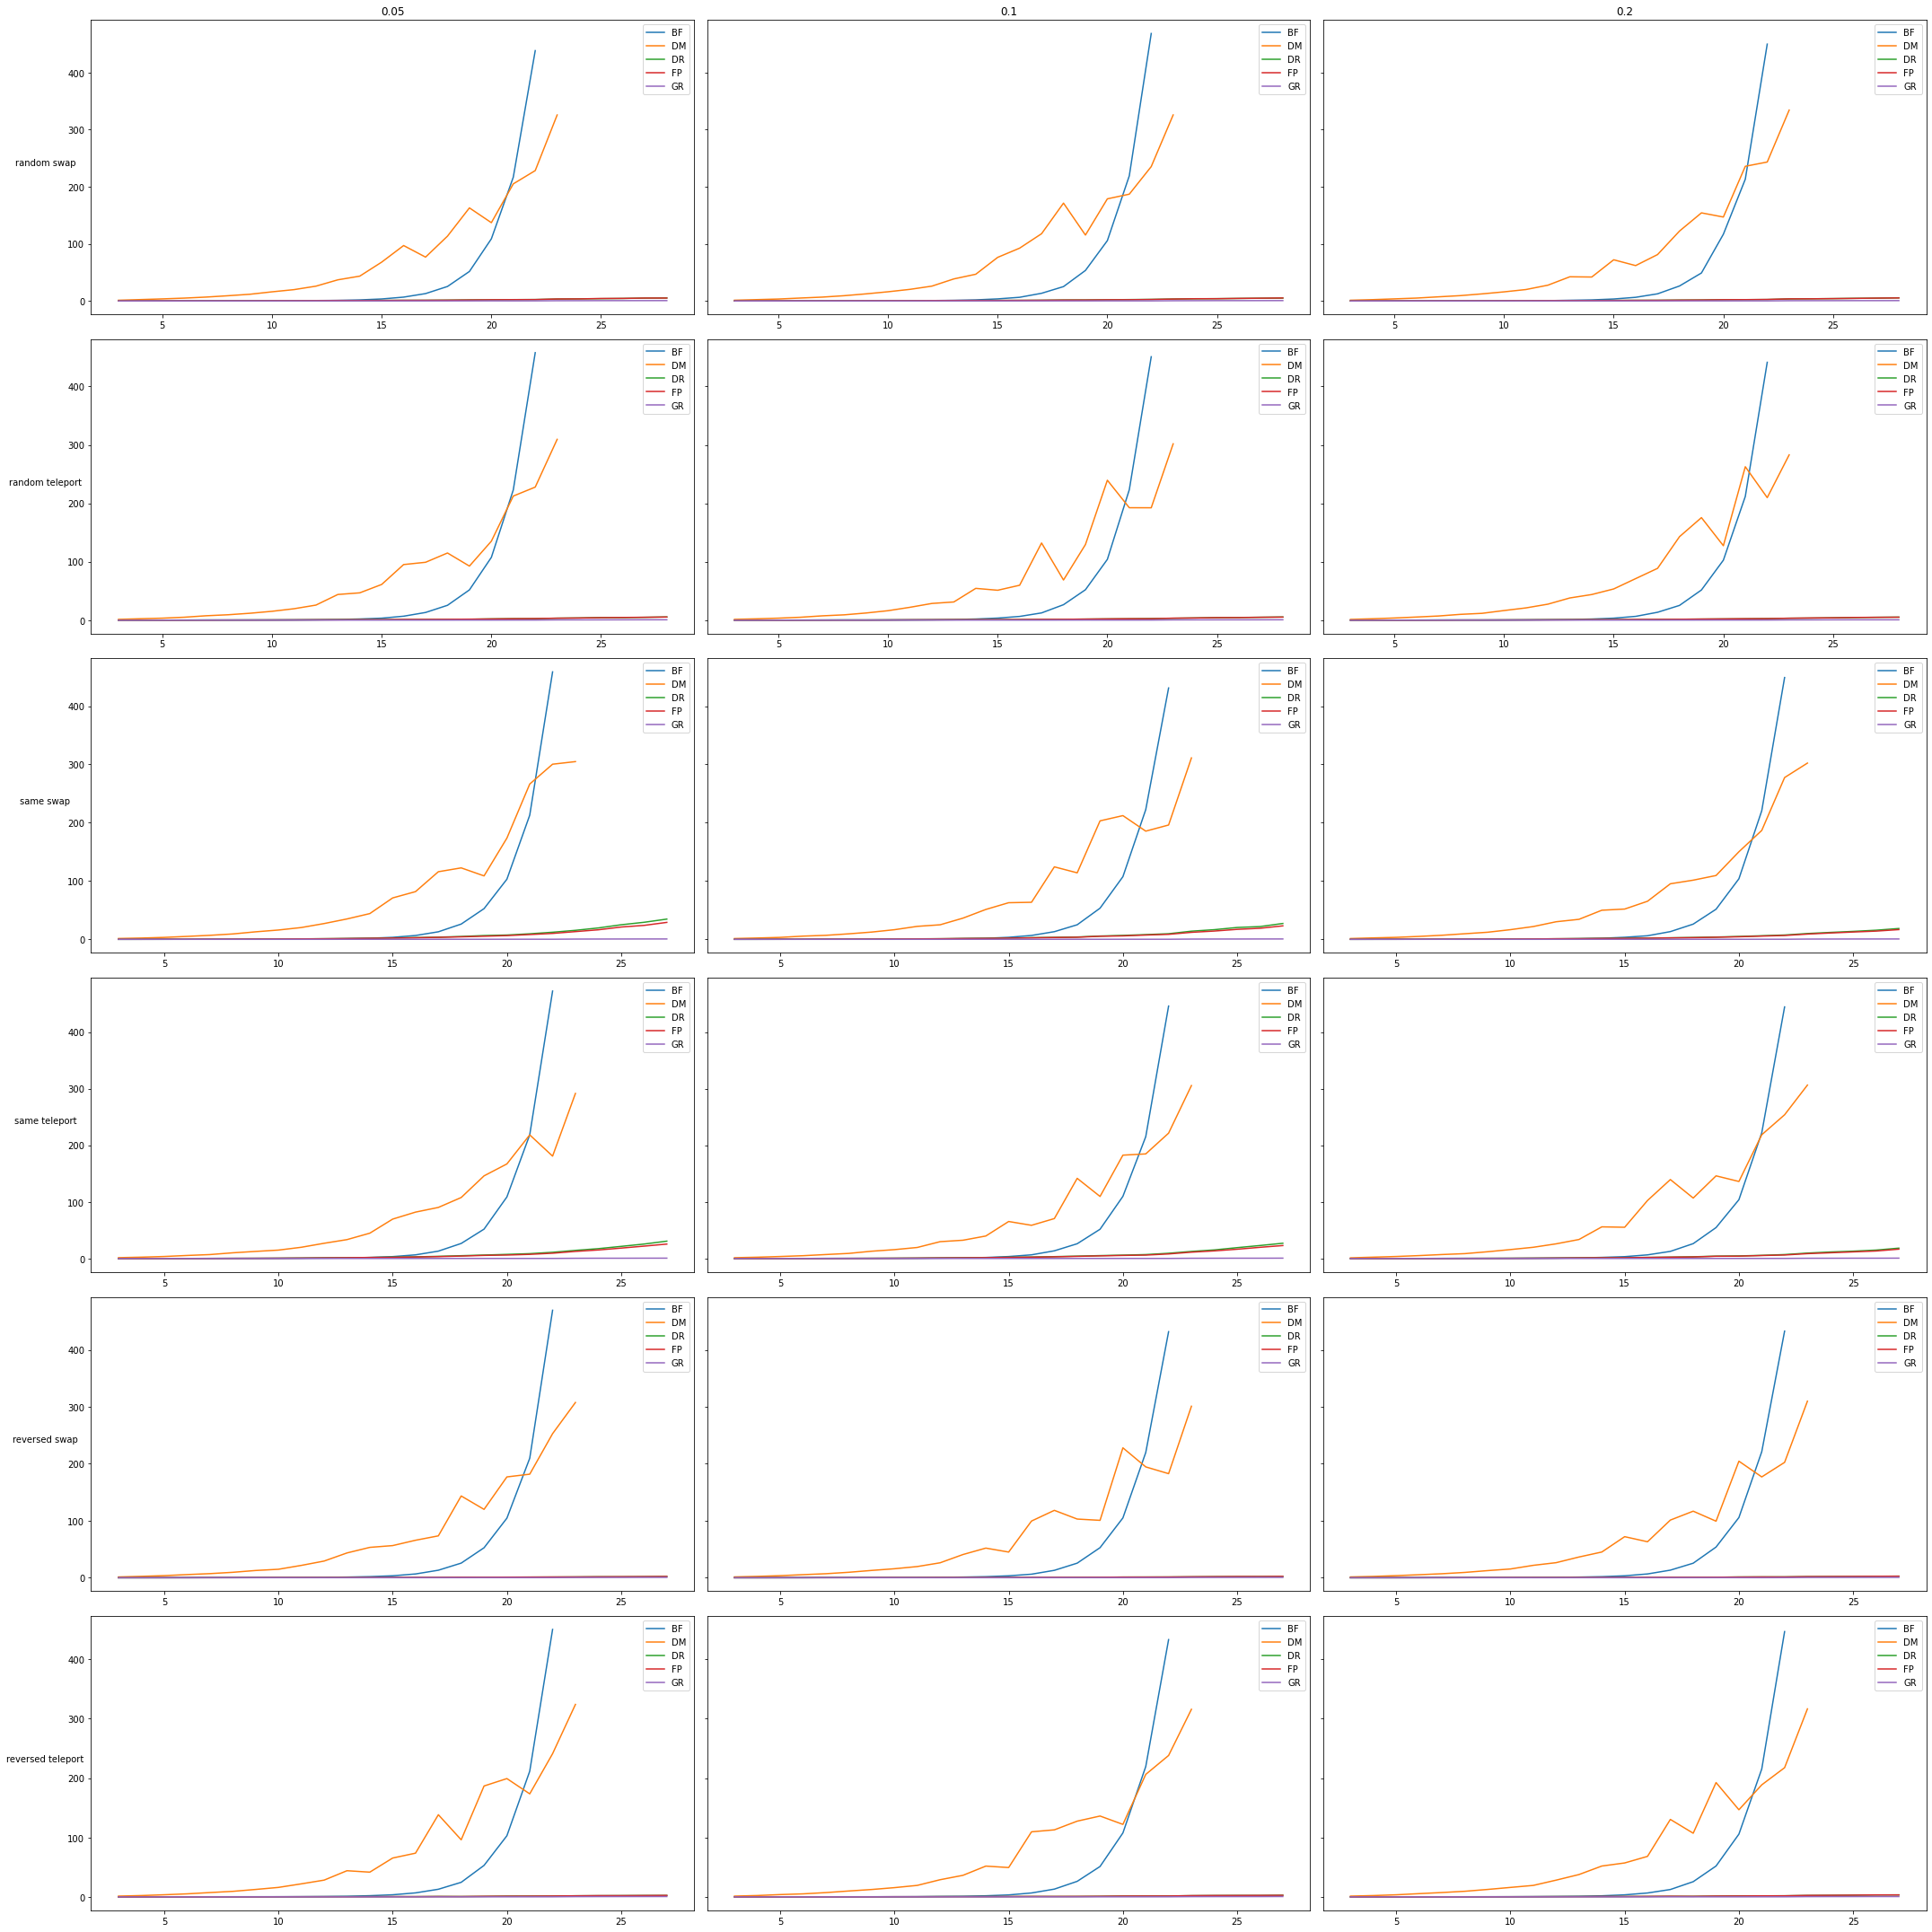

In [12]:
plot_param(lambda x: x["res"]["time"]["avg"])
plt.show()

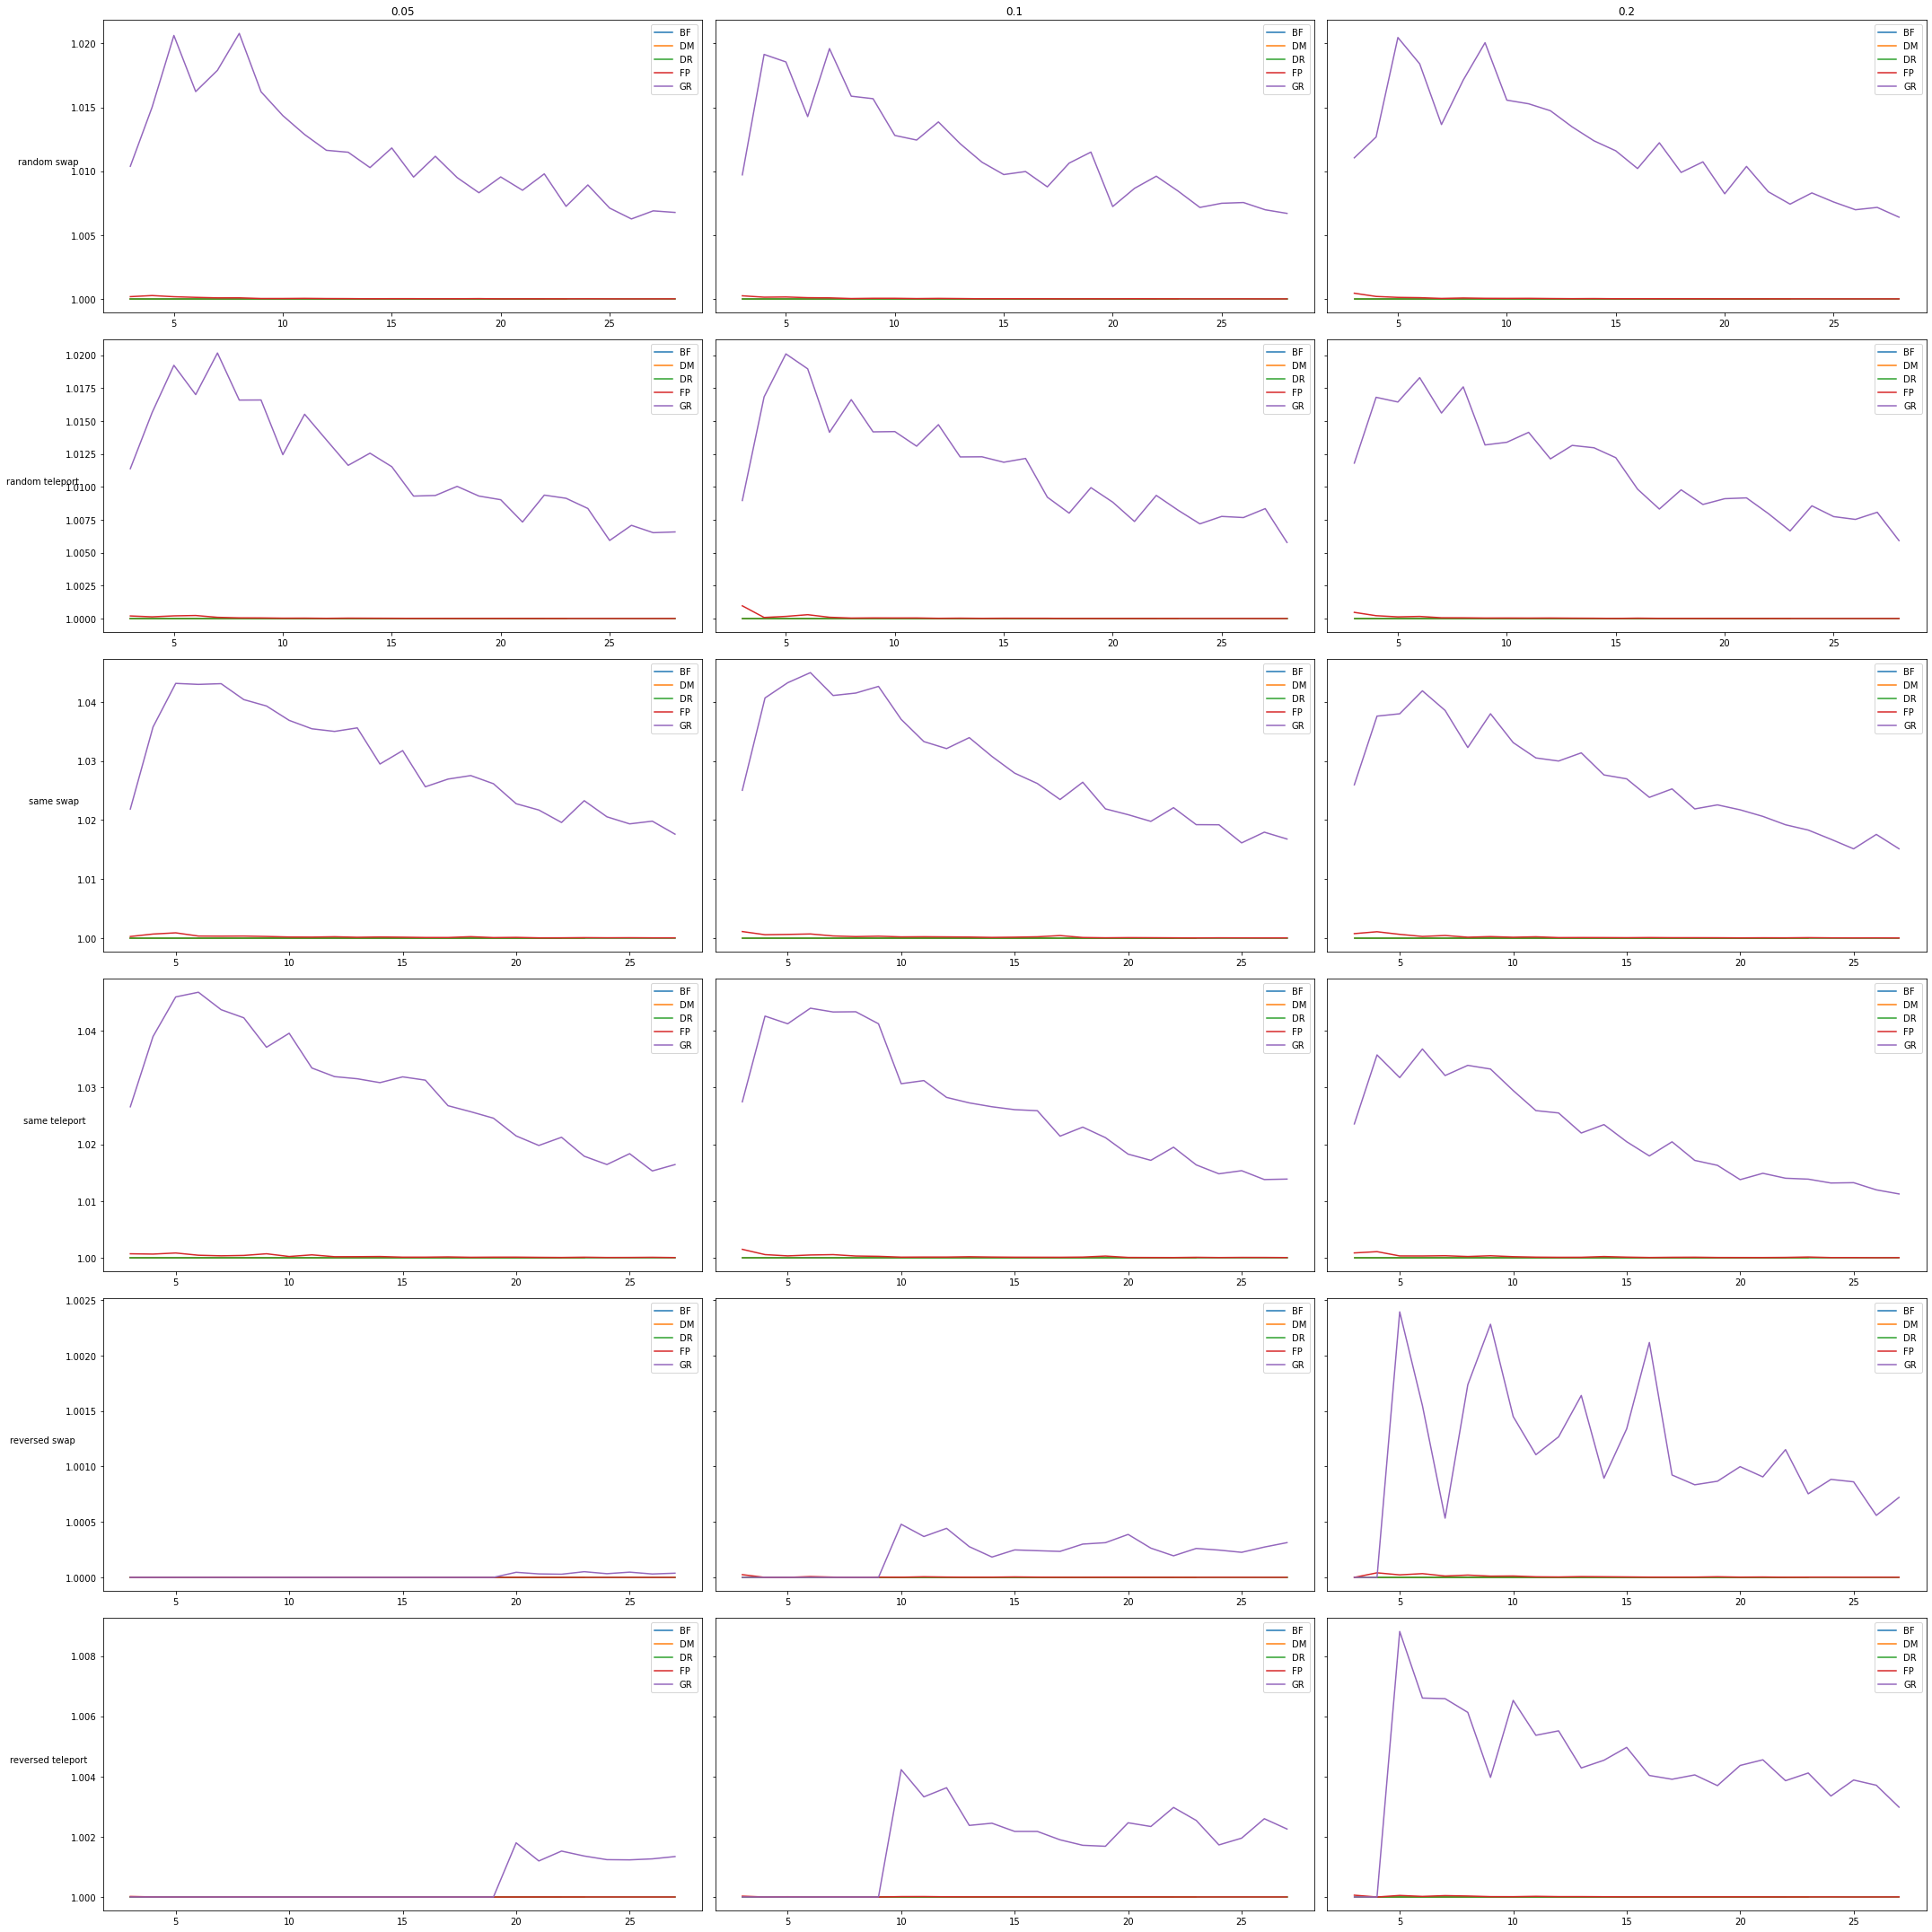

In [13]:
plot_param(lambda x: x["res"]["profitDif"]["proportional"]['avg'])
plt.show()

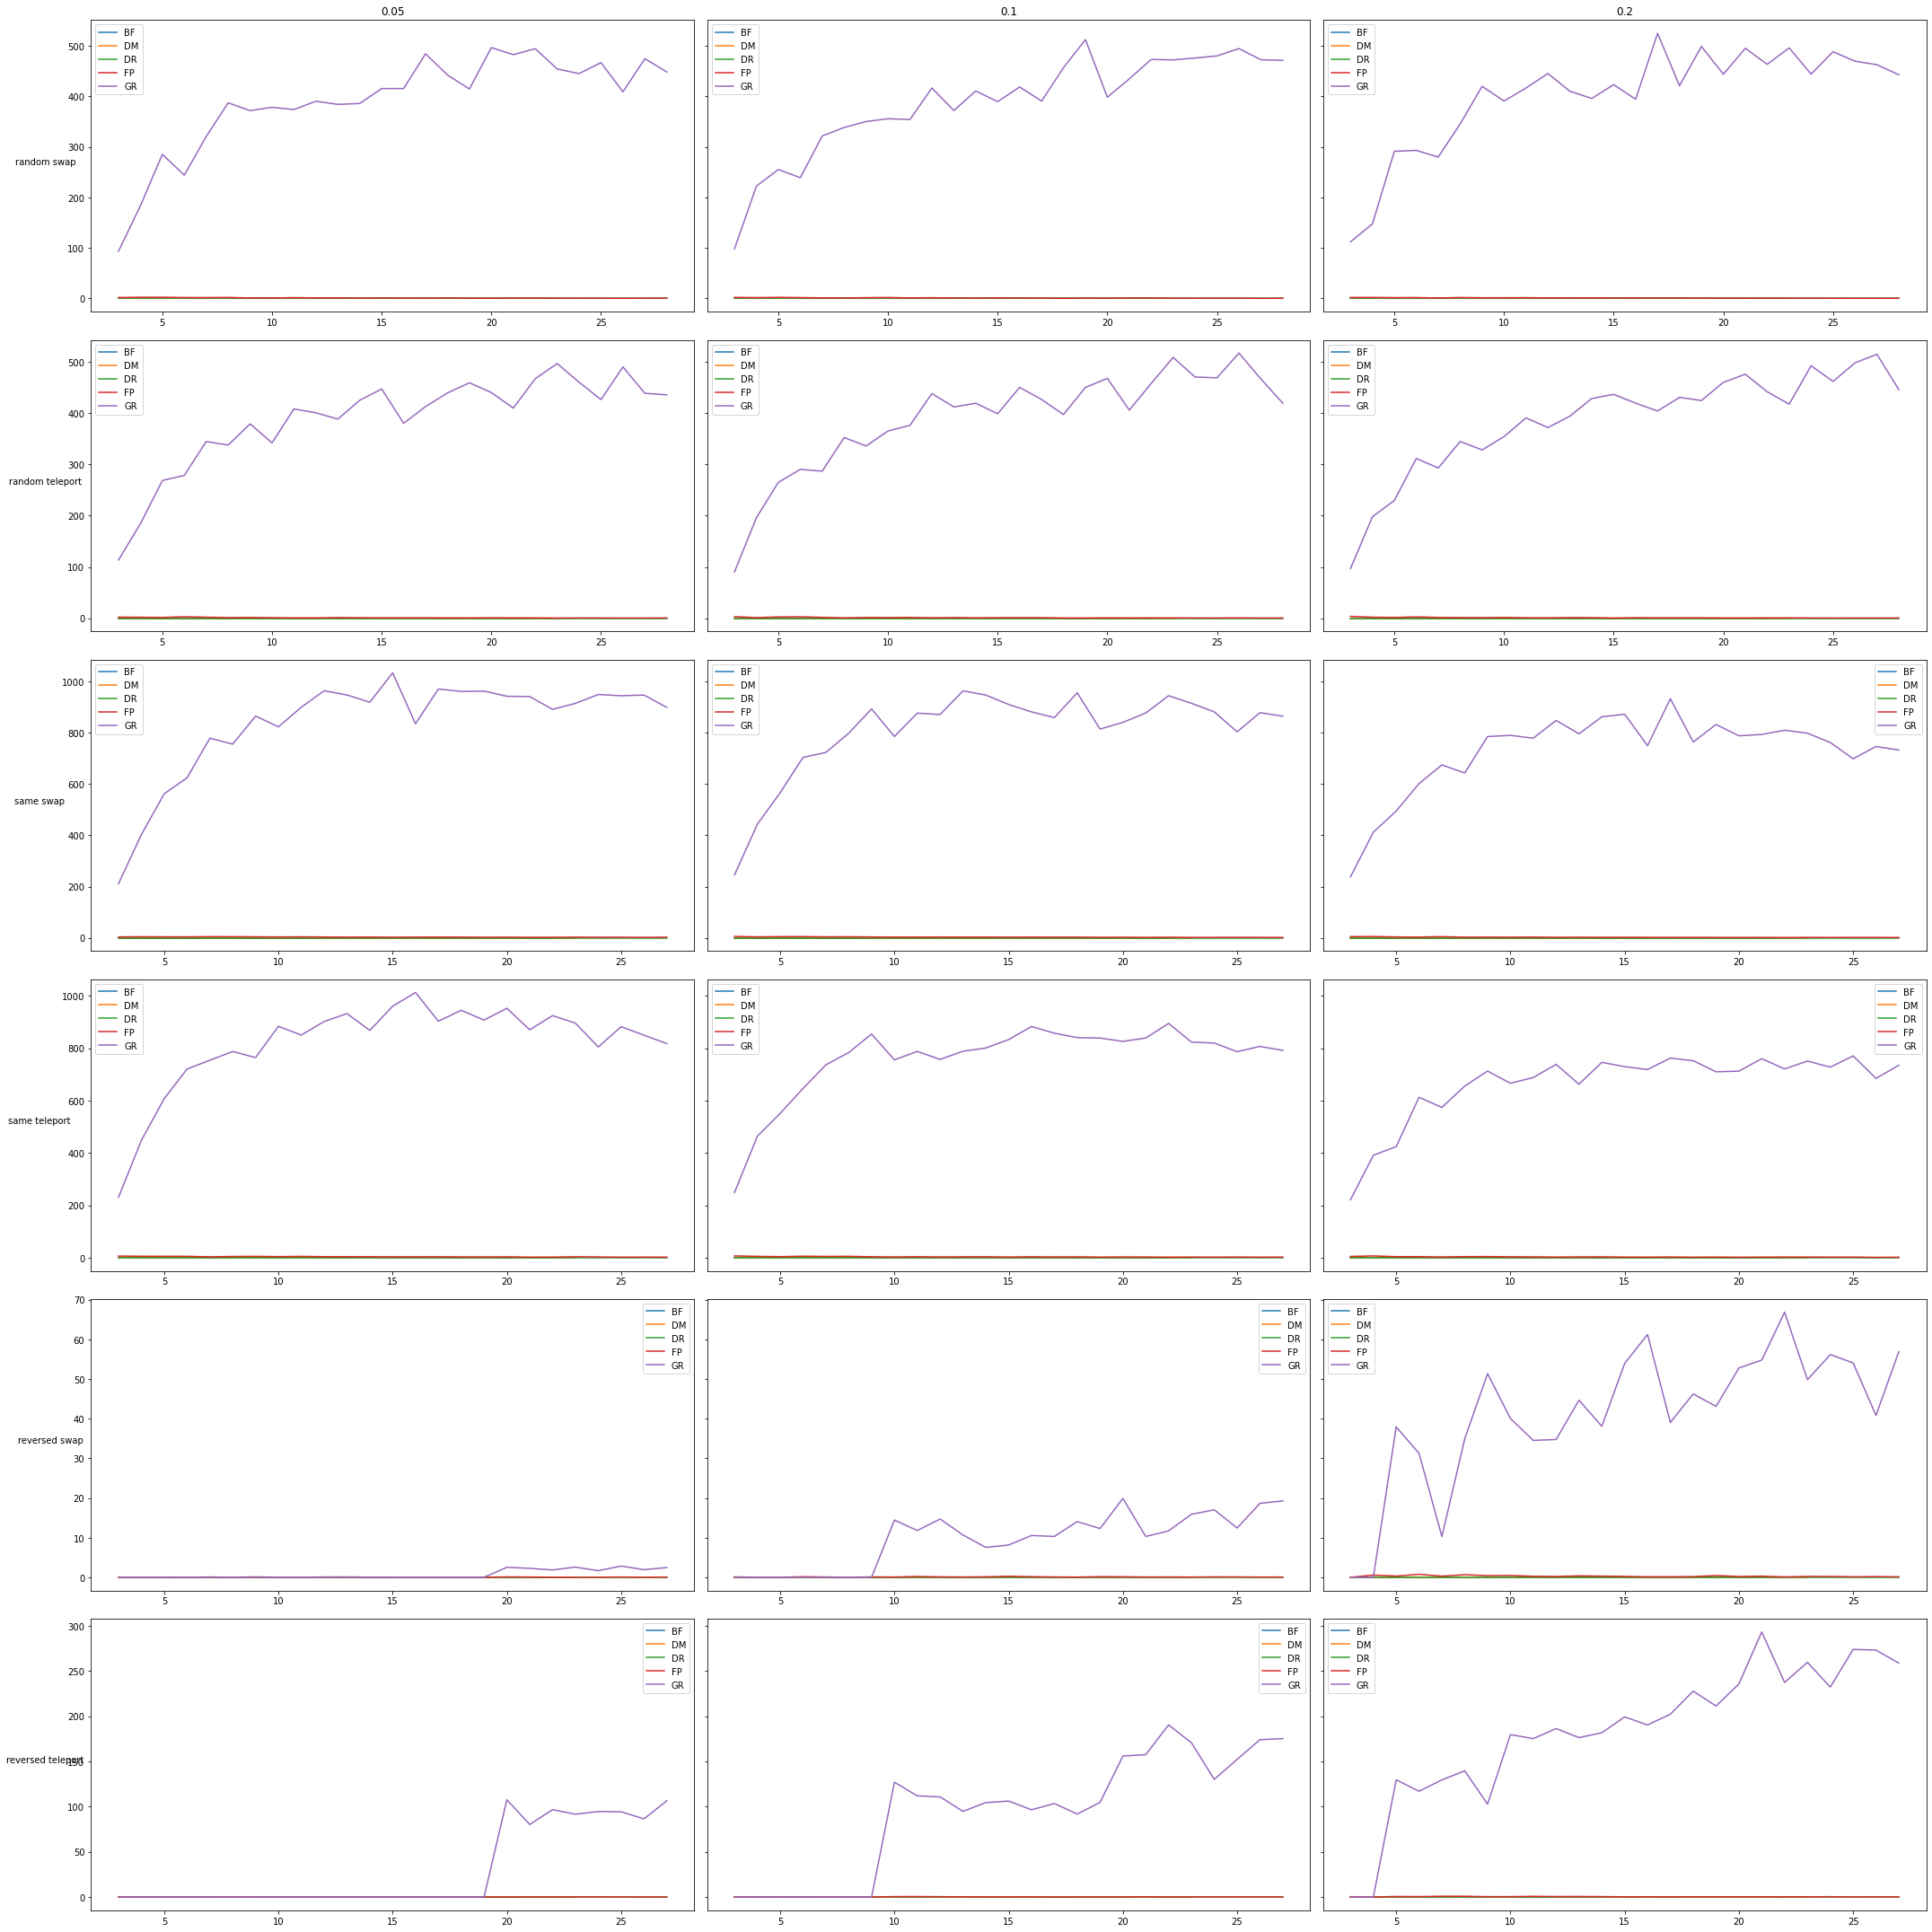

In [14]:
plot_param(lambda x: x["res"]["profitDif"]["fixed"]['avg'])
plt.show()